In [1]:
import pandas as pd
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
%matplotlib inline

## Preprocessing

### Récupération des données

#### Chargement des données

In [2]:
df_data = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv",
                     sep=",")

#### Enregistrement des données au format csv

In [3]:
df_data.to_csv("data.csv")
df_data_ = df_data.copy()

### Exploration des données

#### Exploration générale des données

In [4]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_data.shape

(1338, 7)

In [6]:
df_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Les types de chaque variable correspondent bien à nos données.

In [7]:
df_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Nous constatons que la médiane de la variable charges est nettement inférieure à la moyenne. Les données ne sont pas équitablement réparties. Beaucoup d'observations ont des valeurs de charges faibles alors que peu d'observations ont des valeurs de charges très élevées.

In [8]:
df_data.stb.missing()

,missing,total,percent
age,0,1338,0.0
sex,0,1338,0.0
bmi,0,1338,0.0
children,0,1338,0.0
smoker,0,1338,0.0
region,0,1338,0.0
charges,0,1338,0.0


Aucune valeur n'est manquante.

#### Exploration des variables catégorielles

##### Exploration de la variable sex

In [9]:
df_data["sex"].nunique()

2

Nous avons bien deux valeurs différentes pour la variable sexe.

In [10]:
df_data.stb.freq(["sex"])

,sex,count,percent,cumulative_count,cumulative_percent
0,male,676,50.523169,676,50.523169
1,female,662,49.476831,1338,100.000000


male et female sont tous les deux présents à 50% dans notre jeu de données.

##### Exploration de la variable smoker

In [11]:
df_data["smoker"].nunique()

2

Nous avons bien deux valeurs possibles pour la variable catégorielle smoker.

In [12]:
df_data.stb.freq(["smoker"])

,smoker,count,percent,cumulative_count,cumulative_percent
0,no,1064,79.521674,1064,79.521674
1,yes,274,20.478326,1338,100.000000


##### Exploration de la variable region

In [13]:
df_data["region"].nunique()

4

Nous avons quatre valeurs possibles pour la variable catégorielle region.

In [14]:
df_data.stb.freq(["region"])

,region,count,percent,cumulative_count,cumulative_percent
0,southeast,364,27.204783,364,27.204783
1,southwest,325,24.289985,689,51.494768
2,northwest,325,24.289985,1014,75.784753
3,northeast,324,24.215247,1338,100.000000


Les régions sont équitablement réparties dans notre dataset.

#### Exploration des variables numériques

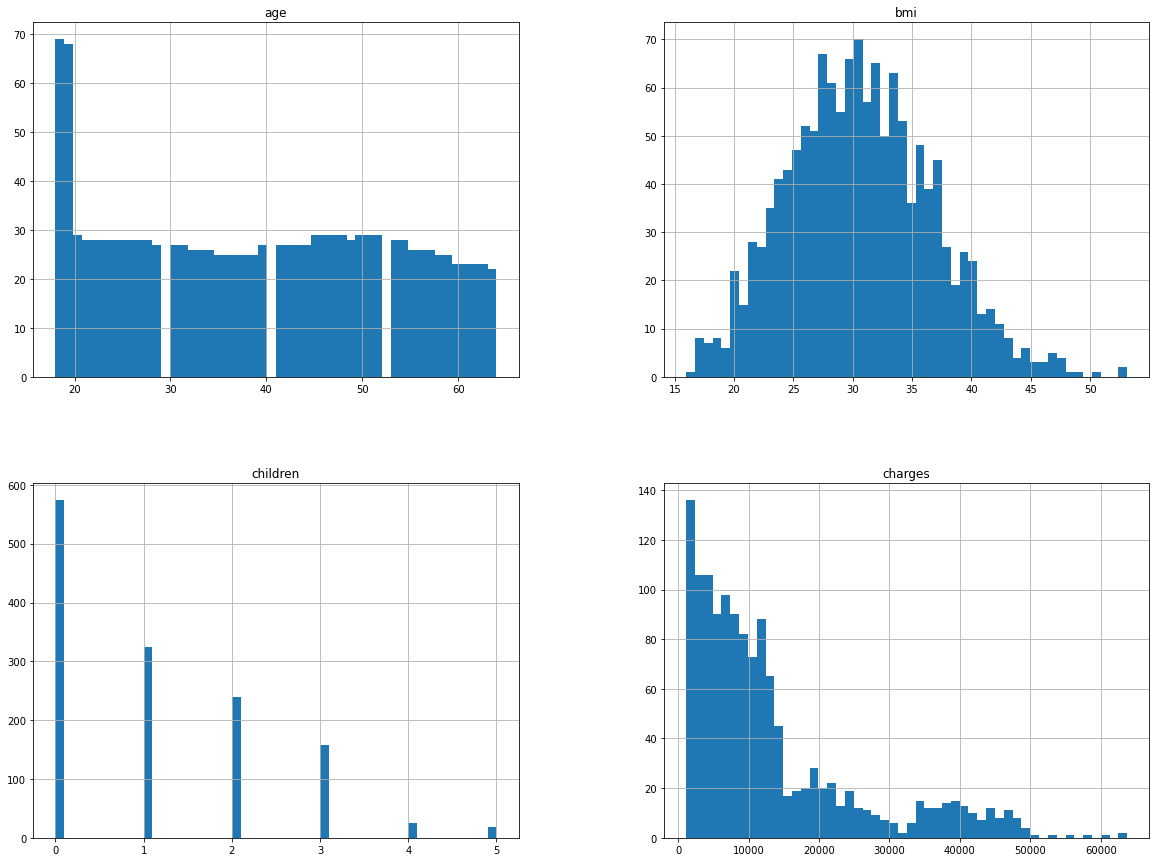

In [15]:
df_data.hist(bins=50, figsize=(20, 15))
plt.show()

L'observation confirme que beaucoup d'observations ont des charges inférieures à 15000 et peu d'observations ont des charges supérieures, mais qui peuvent monter à 60000.

In [16]:
df_data[df_data["charges"]==0]

,age,sex,bmi,children,smoker,region,charges


In [17]:
corr_matrix = df_data.corr()

<AxesSubplot:>

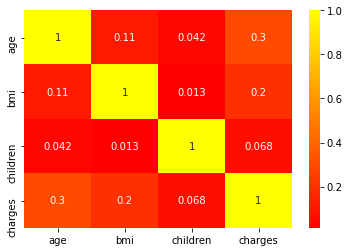

In [18]:
sns.heatmap(corr_matrix, annot = True, cmap='autumn')

In [19]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Nous constatons qu'il n'y a pas de corrélation linéaire forte entre une variable explicative et notre variable expliquée.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

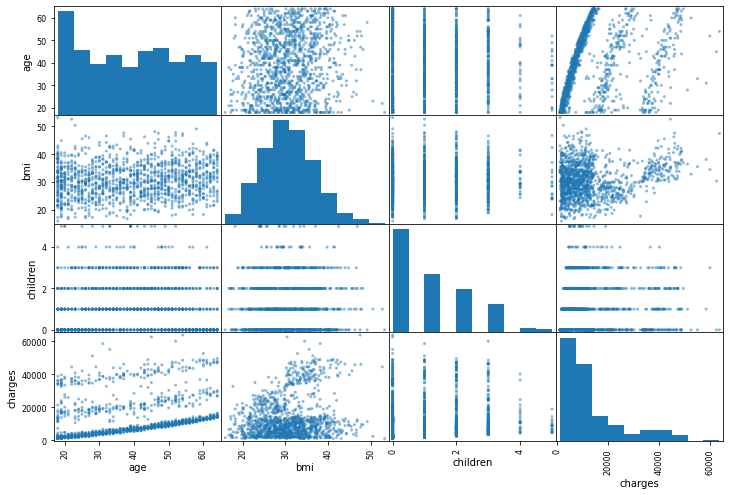

In [20]:
attributes = ['age', 'bmi', 'children', 'charges']
scatter_matrix(df_data[attributes], figsize=(12, 8))

L'observation visuelle confirme qu'il n'y a pas de corrélation linéaire entre nos variables explicatives et notre variable expliquée.

### Nettoyage

#### Requalibrage des variables

In [21]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
scaler = StandardScaler()

In [23]:
#Modification de notre dataframe
df_data[["age", "bmi"]] = pd.DataFrame(scaler.fit_transform(df_data[["age", "bmi"]]), columns=["age", "bmi"])

In [24]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,0,yes,southwest,16884.92400
1,-1.509965,male,0.509621,1,no,southeast,1725.55230
2,-0.797954,male,0.383307,3,no,southeast,4449.46200
3,-0.441948,male,-1.305531,0,no,northwest,21984.47061
4,-0.513149,male,-0.292556,0,no,northwest,3866.85520


#### Transformation de la variable catégorielle villes en variable numérique

In [25]:
df_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df_data = pd.get_dummies(df_data, columns=['sex', 'smoker','region'])

In [27]:
df_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,1,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,3,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,0,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,0,3866.85520,0,1,1,0,0,1,0,0


## Analyse

### Création et optimisation du modèle

#### Division du jeu de données en jeu d'entrainement et en jeu de test

In [28]:
train_set, test_set = train_test_split(df_data, test_size=0.2)

#### Création du modèle

In [29]:
#Ecrire la ligne pour ols était fastidieux. La fonction suivante s'en occupe.
def get_ols_expression(columns, target):
    res = f"{target}~"
    for c in columns:
        if c == target:
            pass
        elif res == f"{target}~":
            res += c
        else:
            res += "+"+c
    return res

In [30]:
#Exemple de sortie de la fonction :
get_ols_expression(df_data.columns, "charges")

'charges~age+bmi+children+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest'

In [31]:
train_set.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
619,1.124479,1.055889,0,10713.64400,1,0,1,0,0,0,0,1
430,-1.438764,0.399711,0,23082.95533,0,1,1,0,0,0,0,1
1267,-1.082758,0.065881,0,34254.05335,0,1,0,1,1,0,0,0
947,-0.157143,0.580160,1,39047.28500,0,1,0,1,1,0,0,0
246,1.480485,1.213372,0,12648.70340,1,0,1,0,0,0,1,0


In [32]:
res = smf.ols(get_ols_expression(train_set.columns, "charges"), data=train_set)
res = res.fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     408.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          1.57e-317
Time:                        19:47:17   Log-Likelihood:                -10840.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8841.9238    127.630     69.278      0.000    8591.488    9092.360
age               3610.4638    187.920     19.213      0.000    3241.727    3979.200
bmi               2084.5376    199.851     10.430      0.000    1692.390    2476.685
children           544.6981    157.255      3.464      0.001     236.132     853.264
sex_female        4444.1112    199.451     22.282      0.000    4052.748    4835.475
sex_male          4397.8126    195.968     22.441      0.000    4013.284    4782.342
smoker_no        -7557.4659    208.332    -36.276      0.000   -7966.255   -7148.677
smoker_yes         1.64e+04    267.144     61.388      0.000    1.59e+04    1.69e+04
region_northeast  2465.7848    329.208      7.490      0.000    1819.813    3111.757
region_northwest  2413.1773    331.747      7.274      0.000    1762.223    3064.132
region_southeast  1880.2248    328.402      5.725      0.000    1235.834    2524.615
region_southwest  2082.7369    331.578      6.281      0.000    1432.114    2733.360
==============================================================================
Omnibus:                      234.786   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.128
Skew:                           1.188   Prob(JB):                    6.98e-119
Kurtosis:                       5.561   Cond. No.                     2.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Toutes les variables explicatives ont un degré de significativité inférieur à notre seuil de significativité de 5%. Il est inutile de réaliser une élimination de certaines variables par backward elimination.

Nous pouvons obsever un adjusted r² de 0,741 pour notre modèle.

#### Entraînement de notre modèle

In [34]:
train_set.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
X = train_set[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = train_set["charges"]

In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(X, y)

LinearRegression()

#### Affichage des paramètres du modèle

In [38]:
regressor.intercept_

19894.32866094235

Notre droite coupe l'axe des ordonnées à 19675.

In [39]:
regressor.coef_

array([  3610.46384107,   2084.53764555,    544.69809901,     23.14929676,
          -23.14929676, -11978.42777967,  11978.42777967,    255.30384315,
          202.69637211,   -330.25619102,   -127.74402424])

## Prédictions

In [40]:
#Calcul des prédictions à partir des données de test
profit_predictions = regressor.predict(test_set[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']])

In [41]:
#Création d'une DataFrame avec les prédictions et les valeurs réelles
df_results = pd.DataFrame({"predictions":profit_predictions, "profit": test_set['charges']})
df_results.head()

,predictions,profit
18,15377.269047,10602.38500
577,33127.421145,58571.07448
938,1667.087464,2304.00220
658,12793.568258,26392.26029
796,10920.821712,4266.16580


In [42]:
def performance_metric(y, y_pred) :
    return r2_score(y,y_pred)

In [43]:
performance_metric(test_set['charges'], profit_predictions)

0.7281581311266718

Notre r² est de 0,78. Ce n'est pas trop mauvais, mais tout de même insuffisant pour effectuer une prédiction fiable des charges payées par les assurés.

Nous avons décidé de tester une régression avec une forêt aléatoire.

### Random forest

#### Entrainement du modèle sans optimisation

In [44]:
#Création de nos variables X (nos features) et y (notre target)
cols = ['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
X = df_data[cols]
y = df_data["charges"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
%%time
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

Wall time: 424 ms


RandomForestRegressor()

In [47]:
preds = regressor.predict(X_test)

In [48]:
def performance_metric(y, y_pred) :
    return r2_score(y,y_pred)

In [49]:
performance_metric(y_test, preds)

0.8623862778932857

Le r² est de 0,86, nettement meilleur que le r² obtenu avec une régression linéaire multiple.

#### Optimisation de la random forest

##### Recherche des variables les plus importantes

In [50]:
regressor.feature_importances_

array([0.13602938, 0.21272725, 0.02033701, 0.00382329, 0.00407019,
       0.40084931, 0.2047759 , 0.0056537 , 0.00469293, 0.00399396,
       0.00304709])

In [51]:
fi = pd.DataFrame({"feature": cols, "importance": regressor.feature_importances_})

In [52]:
fi.sort_values("importance", ascending=False)

,feature,importance
5,smoker_no,0.400849
1,bmi,0.212727
6,smoker_yes,0.204776
0,age,0.136029
2,children,0.020337
7,region_northeast,0.005654
8,region_northwest,0.004693
4,sex_male,0.004070
9,region_southeast,0.003994
3,sex_female,0.003823


On constate un écart important entre les variables children et region_northeast. Nous conserverons toutes les variables qui ont un degré d'importance supérieure ou égal à celui de la variable children.

##### Entrainement du modèle avec les variables explicatives les plus pertinentes

In [53]:
X = df_data[['age', 'bmi', 'smoker_no', 'smoker_yes', 'children']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
X_train.head()

,age,bmi,smoker_no,smoker_yes,children
560,0.483668,-1.757474,1,0,2
1285,0.554869,-1.040599,1,0,0
1142,0.910875,-0.952015,1,0,0
969,-0.014740,0.599846,1,0,5
486,1.053277,-1.508126,1,0,3


In [55]:
%%time
regressor = RandomForestRegressor(n_estimators=30)
regressor.fit(X_train, y_train)

Wall time: 111 ms


RandomForestRegressor(n_estimators=30)

In [56]:
preds = regressor.predict(X_test)
performance_metric(y_test, preds)

0.861340710244785

Nous constatons que le retrait des variables peu pertientes a entraîné une diminution minime du r² (de 0,86 à 0,85) pour un temps d'exécution divisé par plus de trois (116ms contre 383ms).

#### Optimisation des hyper paramètres de la random forest

In [57]:
#Création du Kfold pour le GridSearchCV
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

In [58]:
def performance_metric(y, y_pred):
    return r2_score(y, y_pred)

In [59]:
scoring_fnc = make_scorer(performance_metric)

##### Recherche du nombre d'arbres optimal

In [60]:
params = {"n_estimators": range(10, 120, 10)}

In [61]:
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets)

In [62]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_estimators=30),
             param_grid={'n_estimators': range(10, 120, 10)},
             scoring=make_scorer(performance_metric))

In [63]:
grid_cv.best_params_

{'n_estimators': 110}

Le nombre d'arbres optimal semble être de 80. Nous allons réaliser un travail d'affinage pour avoir un chiffre plus précis.

In [64]:
params = {"n_estimators": range(60, 90, 2)}

In [65]:
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets)

In [66]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_estimators=30),
             param_grid={'n_estimators': range(60, 90, 2)},
             scoring=make_scorer(performance_metric))

In [67]:
grid_cv.best_params_

{'n_estimators': 68}

##### Recherche de l'ensemble des paramètres optimaux

In [68]:
regressor = RandomForestRegressor(n_estimators=84)

In [113]:
#Nous allons faire varier quatre hyper-paramètres
params = {"max_depth":range(1,10),
         "min_samples_split": range(2, 5, 1),
         "min_samples_leaf": range(1, 5, 1),
         "max_features": range(1, 6)}

In [70]:
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets,
                       n_jobs=-1)

In [114]:
#Entraînement de grid_cv
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ExtraTreesRegressor(bootstrap=True, n_estimators=42),
             param_grid={'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(2, 6)},
             scoring=make_scorer(performance_metric))

In [115]:
#Affichage des meilleurs hyper-paramètres
grid_cv.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 3}

#### Entrainement du modèle avec les meilleurs paramètres

In [73]:
regressor = RandomForestRegressor(n_estimators=84, 
                                  max_depth=6,
                                  max_features=5,
                                  min_samples_leaf=3, 
                                  min_samples_split=3)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=5, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=84)

In [74]:
#Calcul des prédictions à partir du set de test
#Comparaison des prédictions et des valeurs réelles et calcul du r²
preds = regressor.predict(X_test)
performance_metric(y_test, preds)

0.8736749431129693

#### Forêt avec des arbres extrêmement aléatoires

##### Recherche des hyper paramètres optimaux

###### Avec randomize search cv

In [75]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [76]:
regressor = ExtraTreesRegressor()

In [77]:
# Nombre d'arbres dans la forêt
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
max_features = ['auto', 'sqrt']
# Profondeur maximale de l'arbre
max_depth = [int(x) for x in np.linspace(2, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [78]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [79]:
#Création de notre objet RandomForestRegressor et entraînement du modèle
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.1s finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 61, 72, 83, 94,
                                                         105, 116, 127, 138,
                                                         150]},
                   random_state=42, verbose=2)

In [80]:
#On récupère la meilleure forêt selon le critère du r²
best_estimator = rf_random.best_estimator_

In [81]:
#Affichage des meilleurs hyper-paramètres
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [82]:
#Calcul des prédictions et du r²
preds = best_estimator.predict(X_test)
performance_metric(y_test, preds)

0.8790735373298486

###### Affinage avec GridSearchCV

In [116]:
#Recherche du nombre optimal d'arbres
params = {"n_estimators": range(50, 150, 10)}

In [117]:
#Création de notre objet ExtraTreesRegressor
regressor = ExtraTreesRegressor(bootstrap=True)

In [118]:
#Création de notre objet GridSearchCV
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets)

In [86]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ExtraTreesRegressor(bootstrap=True),
             param_grid={'n_estimators': range(50, 150, 10)},
             scoring=make_scorer(performance_metric))

In [87]:
#Affichage de la meilleure valeur pour le nombre d'arbres par forêt
grid_cv.best_params_

{'n_estimators': 60}

In [88]:
params = {"n_estimators": range(30, 50, 2)}
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'n_estimators': 32}

In [89]:
regressor = ExtraTreesRegressor(n_estimators=42, bootstrap=True, max_features='auto', max_depth=None)
params = {'min_samples_split': range(2, 6, 1),
         'min_samples_leaf': range(2, 7, 1)}
grid_cv = GridSearchCV(regressor, 
                       param_grid=params, 
                       scoring=scoring_fnc,
                       cv=cv_sets)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 4}

##### Entrainement du modèle

In [90]:
X_train.head()

,age,bmi,smoker_no,smoker_yes,children
560,0.483668,-1.757474,1,0,2
1285,0.554869,-1.040599,1,0,0
1142,0.910875,-0.952015,1,0,0
969,-0.014740,0.599846,1,0,5
486,1.053277,-1.508126,1,0,3


In [91]:
#Création du modèle avec les peimmeurs hyper-paramètres et entraînement
regressor = ExtraTreesRegressor(n_estimators=42, 
                                bootstrap=True, 
                                max_features='auto', 
                                max_depth=None,
                                min_samples_leaf= 4,
                                min_samples_split= 4)

regressor.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=42)

In [92]:
#Calcul des prédictions et affichage du r²
preds = regressor.predict(X_test)
performance_metric(y_test, preds)

0.8794820972967962

L'utilisation d'une forêt très aléatoire nous permet d'augmenter notre r² de 0,87 à 0,88.

## Graphs pour la présentation

In [93]:
df_pres = df_data_.copy()

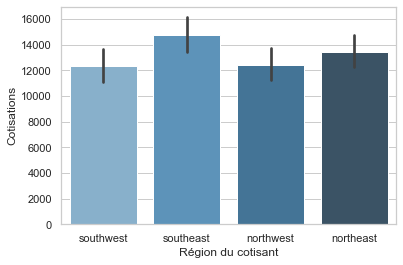

In [94]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="region", y="charges", data=df_pres, palette="Blues_d")
ax.set(xlabel="Région du cotisant", ylabel='Cotisations')
plt.show()

In [95]:
df_pres.shape

(1338, 7)

In [96]:
df_pres[df_pres["children"]==5]["children"].count()

18

Seuls 18 onbervations sur 1338 ont un nombre d'enfants de 5. L'échantillon est trop restreint pour être représentatif. Nous préférons les éliminer de la présentation.

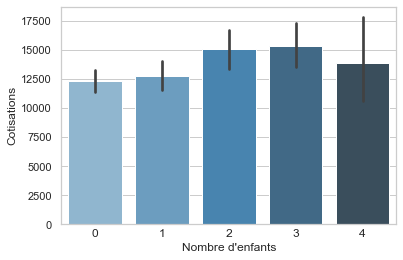

In [97]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="children", y="charges", data=df_pres[df_pres["children"]!=5], palette="Blues_d")
ax.set(xlabel="Nombre d'enfants", ylabel='Cotisations')
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'], fontsize = 12, verticalalignment = 'center')
plt.show()

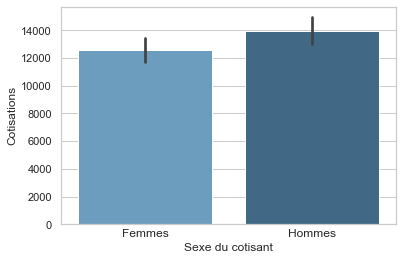

In [98]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sex", y="charges", data=df_pres, palette="Blues_d")
ax.set(xlabel="Sexe du cotisant", ylabel='Cotisations')
ax.xaxis.set_ticklabels(['Femmes', 'Hommes'], fontsize = 12, verticalalignment = 'center')
plt.show()

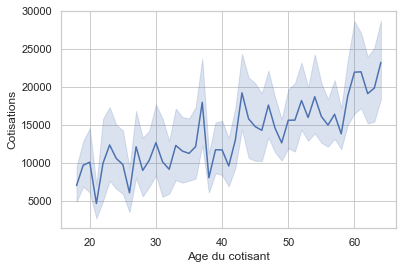

In [99]:
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="age", y="charges", data=df_pres, palette="Blues_d")
ax.set(xlabel="Age du cotisant", ylabel='Cotisations')
#ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5'], fontsize = 12, verticalalignment = 'center')
plt.show()

In [100]:
df_pres["imc_cat"] = df_pres["bmi"].apply(lambda x: int(x//10))

In [101]:
df_pres.head()

,age,sex,bmi,children,smoker,region,charges,imc_cat
0,19,female,27.900,0,yes,southwest,16884.92400,2
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


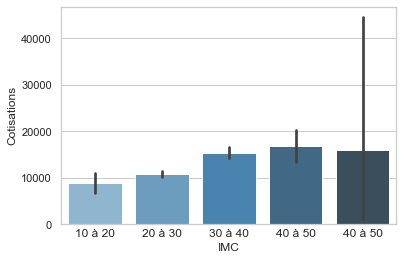

In [102]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="imc_cat", y="charges", data=df_pres, palette="Blues_d")
ax.set(xlabel='IMC', ylabel='Cotisations')
ax.xaxis.set_ticklabels(['10 à 20', '20 à 30', '30 à 40', '40 à 50', '40 à 50'], fontsize = 12, verticalalignment = 'center')
plt.show()

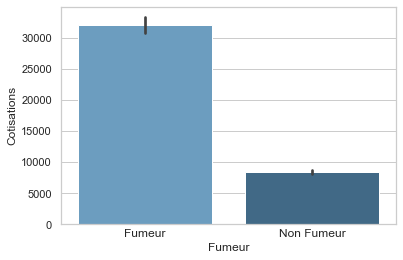

In [103]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="smoker", y="charges", data=df_pres, palette="Blues_d")
ax.set(xlabel='Fumeur', ylabel='Cotisations')
ax.xaxis.set_ticklabels(['Fumeur', 'Non Fumeur'], fontsize = 12, verticalalignment = 'center')
plt.show()

In [104]:
df_pres.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'imc_cat'],
      dtype='object')

### Exemple de prédiction :

In [105]:
X_test.head()

,age,bmi,smoker_no,smoker_yes,children
764,0.412467,-0.900341,1,0,2
887,-0.228344,-0.105546,1,0,0
890,1.765289,-0.619825,0,1,0
1293,0.483668,-0.806836,1,0,3
259,-1.438764,0.206139,0,1,0


In [106]:
df_pres_ = X_test.copy()

In [107]:
df_pres_.head()

,age,bmi,smoker_no,smoker_yes,children
764,0.412467,-0.900341,1,0,2
887,-0.228344,-0.105546,1,0,0
890,1.765289,-0.619825,0,1,0
1293,0.483668,-0.806836,1,0,3
259,-1.438764,0.206139,0,1,0


In [108]:
preds_smokers = regressor.predict(df_pres_[df_pres_["smoker_yes"]==1])
preds_non_smokers = regressor.predict(df_pres_[df_pres_["smoker_no"]==1].iloc[:54, :])

preds_smk = pd.DataFrame({"charges": preds_smokers, "smoker": 1})
preds_smk2 = pd.DataFrame({"charges": preds_non_smokers, "smoker": 0})
preds_sk = pd.concat([preds_smk, preds_smk2])

In [109]:
preds = X_test.copy()

In [110]:
preds["charges_preds"] = regressor.predict(preds)

In [111]:
X.head()

,age,bmi,smoker_no,smoker_yes,children
0,-1.438764,-0.453320,0,1,0
1,-1.509965,0.509621,1,0,1
2,-0.797954,0.383307,1,0,3
3,-0.441948,-1.305531,1,0,0
4,-0.513149,-0.292556,1,0,0


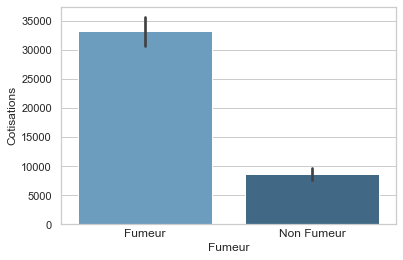

In [112]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="smoker", y="charges", order=[1, 0], data=preds_sk, palette="Blues_d")
ax.set(xlabel='Fumeur', ylabel='Cotisations')
ax.xaxis.set_ticklabels(['Fumeur', 'Non Fumeur'], fontsize = 12, verticalalignment = 'center')
plt.show()